<a href="https://colab.research.google.com/github/vshalisko/GEE/blob/main/Colab/pixel_border_labelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import ee
#import geemap
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
from osgeo import gdal, osr

Conección con GEE (opcional)

In [ ]:
# Trigger the authentication flow.
#ee.Authenticate()

# Initialize the library.
#ee.Initialize(project='ee-viacheslavs')

Coneccion con Google Drive para almacenar archivos

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


Leer archivos con datos numpy array

In [ ]:
# Save the arrays as .npy files
prediction_2015 = np.load('/content/drive/MyDrive/Colab Data/Gdl_2015_prediction_float.npy')
prediction_2020 = np.load('/content/drive/MyDrive/Colab Data/Gdl_2020_prediction_float.npy')

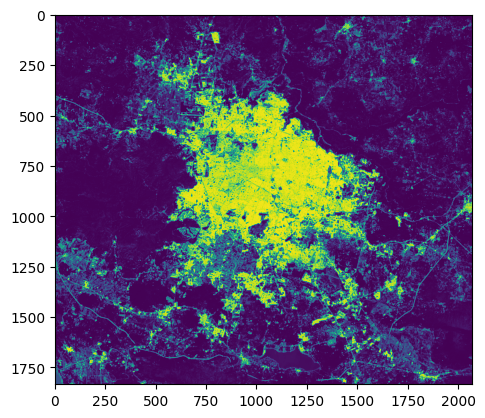

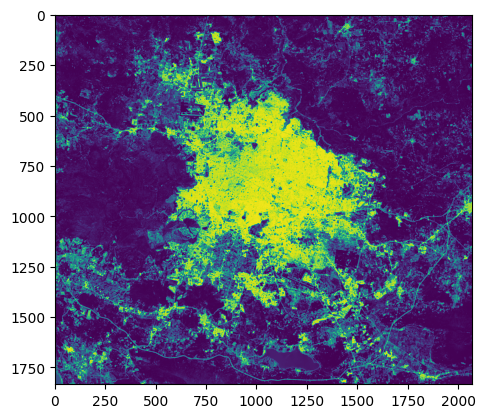

In [ ]:
B_img_pred_2015 = (prediction_2015).astype('float')
plt.imshow(B_img_pred_2015[:,:])
plt.show()

B_img_pred_2020 = (prediction_2020).astype('float')
plt.imshow(B_img_pred_2020[:,:])
plt.show()

Preparar los parametros de georefferenciación y definir funcion de exportar GeoTIFF

In [ ]:
limites_utm = [640000, 702800, 2255000, 2310000]
pixel = 30

# create Spatial Reference (projection)
sr = osr.SpatialReference()
sr.ImportFromEPSG(32613)

## adfGeoTransform[0] /* top left x */
## adfGeoTransform[1] /* w-e pixel resolution */
## adfGeoTransform[2] /* rotation, 0 if image is "north up" */
## adfGeoTransform[3] /* top left y */
## adfGeoTransform[4] /* rotation, 0 if image is
## adfGeoTransform[5] /* n-s pixel resolution */

geotrans = [limites_utm[0], pixel, 0, limites_utm[3], 0, -pixel]

print(geotrans)
#print(sr)
print(sr.ExportToWkt())

def write_geotiff(arr, filename, proj, transform):
    if arr.dtype == np.float32:
        arr_type = gdal.GDT_Float32
    else:
        arr_type = gdal.GDT_Int32
    driver = gdal.GetDriverByName("GTiff")
    out_ds = driver.Create(filename, arr.shape[1], arr.shape[0], 1, arr_type)
    out_ds.SetProjection(proj)
    out_ds.SetGeoTransform(transform)
    band = out_ds.GetRasterBand(1)
    band.WriteArray(arr)
    band.FlushCache()
    band.ComputeStatistics(False)



[640000, 30, 0, 2310000, 0, -30]
PROJCS["WGS 84 / UTM zone 13N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-105],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32613"]]


Guardar los GeoTIFF

In [ ]:
write_geotiff(prediction_2015, filename='/content/drive/MyDrive/Colab Data/Gdl_2015_prediction_float.tif', proj=sr.ExportToWkt(), transform=geotrans)
write_geotiff(prediction_2020, filename='/content/drive/MyDrive/Colab Data/Gdl_2020_prediction_float.tif', proj=sr.ExportToWkt(), transform=geotrans)